In [42]:
#from src.io_utils import load_data, coerce_numeric 

#df = coerce_numeric(load_data("data/health_study_dataset.csv"))

#df.info()


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

df = pd.read_csv("data/health_study_dataset.csv")

In [44]:
# Calculates a summary of statistics for age, weight, height, systolic_bp, cholesterol

stats= df[["age", "weight", "height", "systolic_bp", "cholesterol"]].agg(["mean", "median", "min", "max"])
stats_summary = stats.rename(
    columns= {
    "age": "Age (years)",
    "weight": "Weight (kg)",
    "height": "Height (cm)", 
    "systolic_bp": "Systolic Blood Pressure (mmHg)",
    "cholesterol": "Cholesterol (mmol(L)"
})
stats_summary.round(1)


,Age (years),Weight (kg),Height (cm),Systolic Blood Pressure (mmHg),Cholesterol (mmol(L)
mean,49.4,73.4,171.8,149.2,4.9
median,50.0,73.2,171.4,149.4,5.0
min,18.0,33.7,144.4,106.8,2.5
max,90.0,114.4,200.4,185.9,7.9


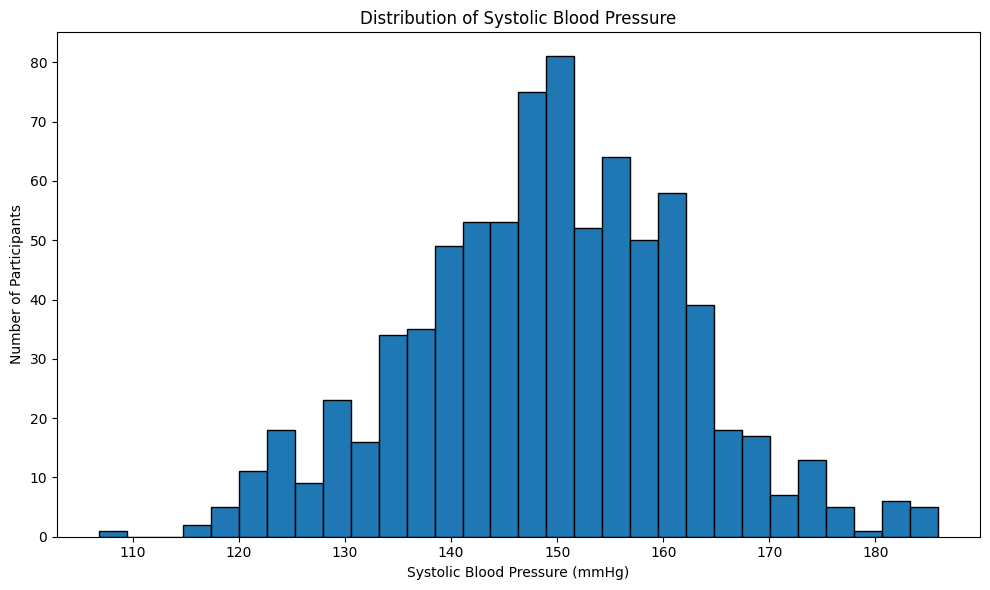

In [45]:
# Histogram of systolic blood pressure
plt.figure(figsize=(10,6))
plt.hist(df["systolic_bp"], bins = 30, edgecolor= "black")
plt.title("Distribution of Systolic Blood Pressure")
plt.xlabel("Systolic Blood Pressure (mmHg)")
plt.ylabel("Number of Participants")
plt.tight_layout()


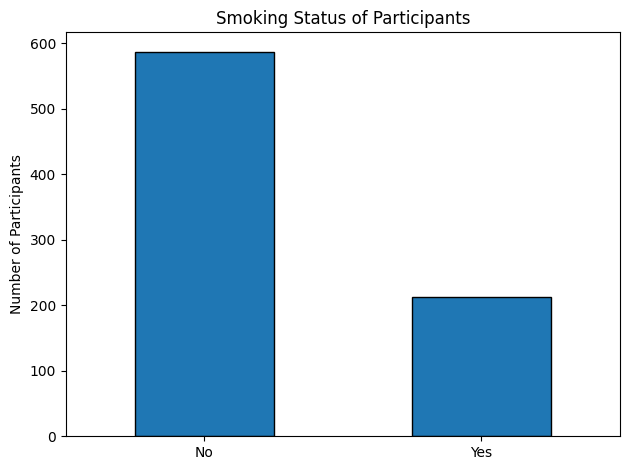

In [46]:
# Bar plot of smokers vs non-smokers

total_smokers = df["smoker"].value_counts()
total_smokers.plot(kind="bar", edgecolor= "black")
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Number of Participants")
plt.title("Smoking Status of Participants")
plt.tight_layout()

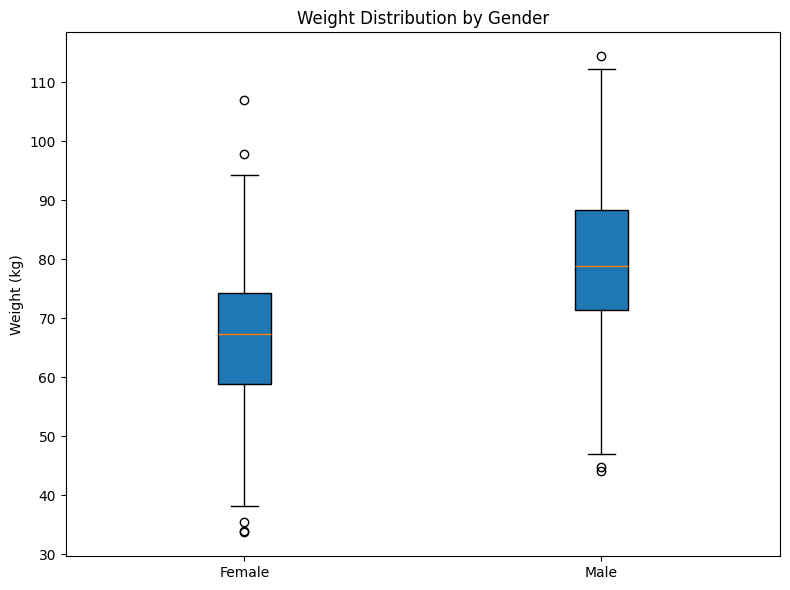

In [47]:
# Boxplot of weight distribution by gender 

F_weight = df[df["sex"] == "F"]
female_weight = F_weight["weight"]
M_weight = df[df["sex"] == "M"]
male_weight = M_weight["weight"]

plt.figure(figsize=(8,6))
plt.boxplot([female_weight, male_weight], tick_labels=["Female", "Male"], patch_artist= True)
plt.title("Weight Distribution by Gender")
plt.ylabel("Weight (kg)")
plt.tight_layout()

In [48]:
# Calculates the actual proportion of participants with the disease

disease_count = df["disease"].mean()
print(f"Actual proportion of participants with the disease: {disease_count:.2%}")


#Simulated the disease status of 1000 participants

random.seed(42)
n = 1000

simulated = []
for i in range(n):
    if random.random() < disease_count:
        simulated.append(1)
    else: 
        simulated.append(0)
simulated_count = sum(simulated)/n

print(f"Simulated proportion of participants with the disease: {simulated_count:.2%}")


#Difference between actual and simulated proportions

diff = disease_count - simulated_count
print(f"The difference: {diff:.2%}")

Actual proportion of participants with the disease: 5.88%
Simulated proportion of participants with the disease: 4.90%
The difference: 0.97%


Beräkna konfidensintervall för medelvärdet av systolic_bp (ex normalapproximation/bootstrap)

Testa hypotesen: "Rökare har högre medel-blodtryck än icke-rökare"
- Använd metod eg. bootstrap/t-test funktion
- Förklara kort resultatet i markdown!!

Förklaring av resultatet här: